## 🧪 **Case Study Title**:

**Hospital Emergency Room (ER) Analytics: Patient Arrivals, Diagnosis Accuracy, and Treatment Time**



### 🎯 Objective:

Help hospital administrators use probability-based analytics to:

* Predict **hourly patient arrivals** (Poisson)
* Evaluate **diagnosis accuracy rates** (Binomial)
* Estimate **treatment time distributions** using CLT



## 📁 Simulated Dataset Generation (Python Code)

In [1]:
import pandas as pd
import numpy as np

np.random.seed(123)

days = 14   # 2 weeks
hours = 24
total_rows = days * hours

# Patient arrivals per hour (Poisson distribution)
patient_arrivals = np.random.poisson(lam=5, size=total_rows)

# Simulate diagnosis accuracy: 80% of patients correctly diagnosed
diagnosed_correctly = np.random.binomial(patient_arrivals, p=0.8)

# Simulate treatment time per patient (Exponential distribution)
treatment_time = np.random.exponential(scale=40, size=total_rows)  # in minutes

df = pd.DataFrame({
    "Day": np.repeat(np.arange(1, days + 1), hours),
    "Hour": np.tile(np.arange(0, 24), days),
    "Patient_Arrivals": patient_arrivals,
    "Diagnosed_Correctly": diagnosed_correctly,
    "Avg_Treatment_Time_Min": np.round(treatment_time, 2)
})

df.head()

,Day,Hour,Patient_Arrivals,Diagnosed_Correctly,Avg_Treatment_Time_Min
0,1,0,7,6,76.85
1,1,1,5,4,7.07
2,1,2,4,4,19.68
3,1,3,8,5,32.31
4,1,4,4,3,7.84


## 📊 Analysis Sections

### 📌 1. **Patient Arrival Forecasting (Poisson Distribution)**

> Determine how many doctors/nurses should be on call.

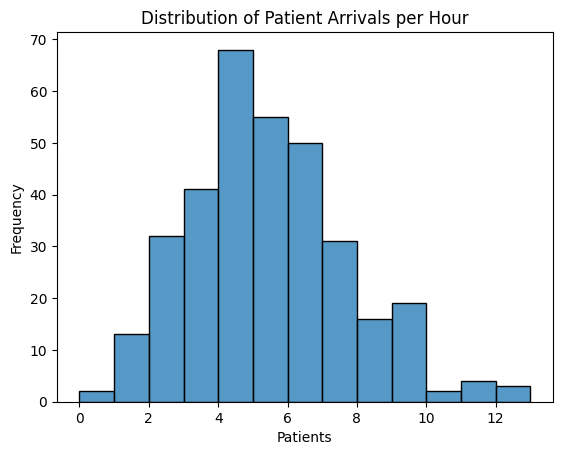

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Patient_Arrivals"], bins=range(0, max(df["Patient_Arrivals"])+1))
plt.title("Distribution of Patient Arrivals per Hour")
plt.xlabel("Patients")
plt.ylabel("Frequency")
plt.show()


🔍 **Insight**:
Most ERs follow a Poisson process. This helps predict **peak hours** (e.g., evenings/weekends).



### 📌 2. **Diagnosis Accuracy (Binomial Distribution)**

> Evaluate how reliably doctors are identifying conditions.

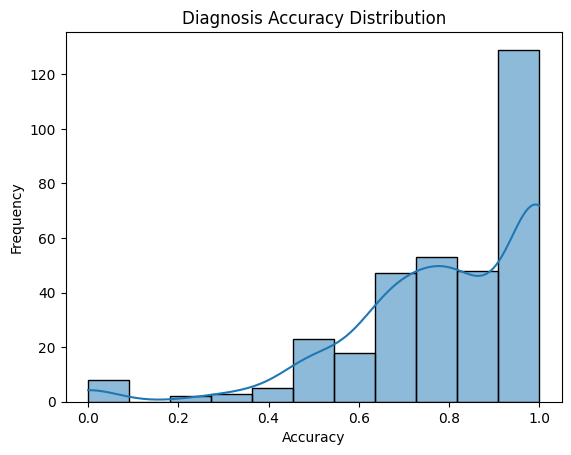

In [3]:
df["Diagnosis_Accuracy"] = (df["Diagnosed_Correctly"] / df["Patient_Arrivals"]).fillna(0)

sns.histplot(df["Diagnosis_Accuracy"], kde=True)
plt.title("Diagnosis Accuracy Distribution")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()

🔍 **Insight**:

* Check if the 80% benchmark is met.
* Spot hours where accuracy dropped (potentially understaffed).



### 📌 3. **Treatment Duration Analysis (CLT)**

> Estimate the average treatment time using random samples.

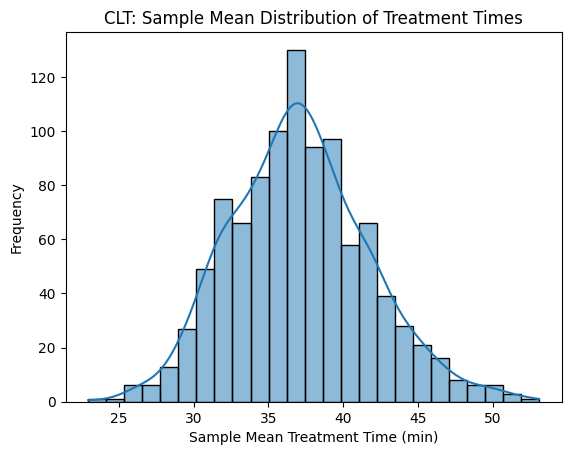

In [6]:
sample_means = [df["Avg_Treatment_Time_Min"].sample(50).mean() for _ in range(1000)]

sns.histplot(sample_means, kde=True)
plt.title("CLT: Sample Mean Distribution of Treatment Times")
plt.xlabel("Sample Mean Treatment Time (min)")
plt.ylabel("Frequency")
plt.show()

🔍 **Insight**:
Although individual treatment times vary widely, **sample means converge to normal** → helpful for **predicting average treatment window**.


What This Solves in Real Life:




| Problem                     | Method   | Outcome                                |
| --------------------------- | -------- | -------------------------------------- |
| Forecast ER traffic         | Poisson  | Optimized shift planning               |
| Evaluate doctor accuracy    | Binomial | Staff training/improvement             |
| Predict avg. treatment time | CLT      | Communicate wait estimates to patients |


## 📝 Summary

* **Poisson** = Understand patient flow → staff better
* **Binomial** = Monitor diagnosis performance
* **CLT** = Forecast mean treatment durations → better scheduling